<a href="https://colab.research.google.com/github/Namit360/Data-Sci/blob/main/DATA_SCIENCE_PROJECT_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
X=df.iloc[:,1:5]

In [5]:
y=df.iloc[:,6]

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [9]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
df[["Fuel_Type","Seller_Type","Transmission"]]=df[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

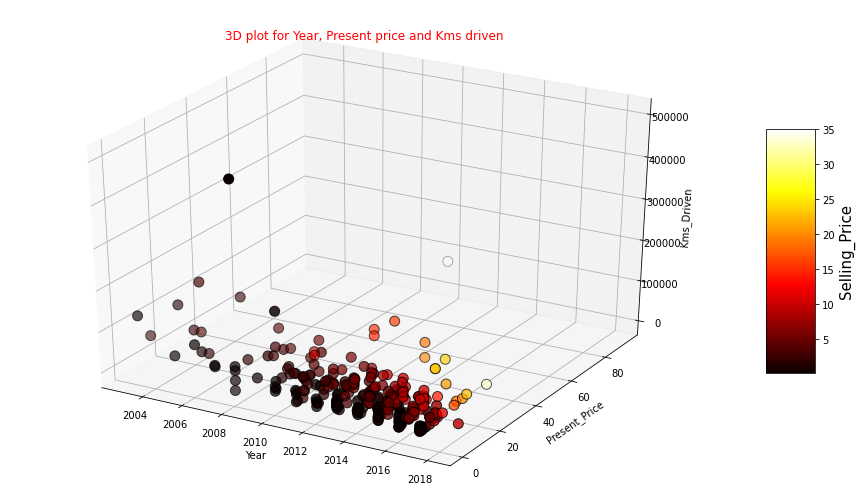

In [17]:
# 3d plotting for year, present orice and km driven on basis of selling price

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

# using scatter plot

plot =  ax.scatter(df["Year"],
           df["Present_Price"],
           df["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=df["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

In [18]:
x=df.drop(["Selling_Price","Car_Name"],axis=1)
y=df.Selling_Price

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
# apply DecisionTree Algorithm

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [25]:
dtr.fit(x_train,y_train)
predicts=dtr.predict(x_test)
prediction=pd.DataFrame(predicts)
R_2=r2_score(y_test,prediction)

In [28]:
r2 = [] 
r2.append(R_2)

In [29]:
r2

[0.9551352856284795]

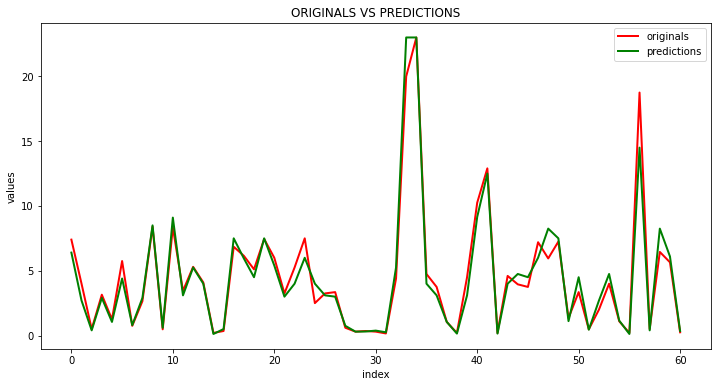

In [31]:
# prediction vs original values 
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()